## Tabnet 

정형 데이터 (구조화된 데이터, 즉 미리 정해진 구조에 따라 저장된 데이터) 에 적합한 딥러닝 모델 

기존 딥러닝 모델들은 이미지, 텍스트, 음성 등 다양한 비정형 영역에서 우수한 성능을 보여줬다. 그러나 정형데이터의 경우에는 최근까지도 XGBoost, LightGBM, Catboost와 값은 트리 기반의 앙상블 모델들이 주로 사용되고 있다. 

그 이유는 일반적으로 Tabular data는 대략적인 Hyperplane(초평면) 경계르르 가지는 Manifold라고 한다. 부스팅 모델들은 이러한 Manifold에서 결정을 할 때 더 효율적으로 작동한다고 한다. 즉 정형 데이터의 포인트들이 어떤 차원(Manifold)상에서 위치하는 특성으로 인해 부스틩 모델의 결정기준이 더 적합다하는 것으로 해석할 수 있다.   

트리 기반의 모델들이 학ㄷ습이 빠르고 쉽게 개발할 수 있다. 트리 기반의 모델들은 높은 해석력을 가지고 있다는 장점이 있다. 트리 기반 모델의 특성 상 변수 중요도를 구할 수 있으므로 딥러닝 모델에 비해 상대적으로 해석이 용이하다. 

------

위와 같은 이유들에도 불구하고 정형데이터에 딥러닝 모델을 사용하는 것은 가치있다고 Tabnet논문의 저자는 주장  

훈련 데이터가 매우 많아지면, 계산 비용은 많이 들겠지만 성능은 더 높일 수 있다.   

Tabular 데이터와 이미지 등 다른 데이터 타입을 학습에 함께 사용할 수 있다.   

트리 기반에서 필수적인 Feature Engineering과 같은 단계를 크게 요구하지 않는다. 

Streaming 데이터로부터의 학습이 용이하다. 트리 기반의 모델들은 데이터의 분기를 통해  Global한 통계적 정보를 이용햐야 하므로 Streaming 학습은 어렵다는 단점이 존재한다. 반면 딥러닝 모델은 그러한 학습에 유연하다. 

딥러닝 End-to-End 모델은 Domain adaptation, Generative modeling , Semi-supervised learning과 같은 가치있는 Application이 가능하다는 장점이 있다. 

------

* Tabnet은 Feature의 전처리 없이 raw한 데이터를 입력으로 사용할 수 있고, Gradient-descent 기반 최적화를 사용하여 End-to-End learning을 가능하게 함  

* 성능과 해석력을 향상시키기 위하여, Tabnet은 Sequential attention mechanism을 사용하여 각 의사결정에서 어떤 feature를 사용할지를 선택한다. 이러한 Feature selection은 instance-wise하게 입력 각각마다 다르게 수행됨 

* 여러 데이터셋에서 기존의 정형 분류, 회귀 모델들보다 성능의 우수성을 가짐, 해석력의 관점에서 입력 Feature의 중요도와 Feature들이 어떻게 결합되었는지를 시각화한 local한 해석력과, 학습된 모델에서 각 입력 Feature들이 얼마나 자주 결합되었는지의 Global한 해석력을 제시함 

-------

<img src="https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F85f40e29-e24f-4ecb-9ed3-0100094580f9%2FUntitled.png&blockId=65586f46-e5af-49ab-92ec-ddc0bc0e2d06" width="500" height="300"/>  


 
##### TabNet의 전반적인 구조. 
전체적인 Architecture는 입력부분과 Step1~N으로 나누어져 있고, 각 단계마다 Feature transformer와 Attentive transformer, Feature masking으로 구성되어 있습니다. 그리고, Split block은 Feature transformer로부터 나온 representation을 두 개로 나누어, 하나는 ReLU를 태워 최종 아웃풋으로 보내주고, 나머지 하나는 다음 Attentive transformer로 넘겨줍니다. 그 후, Feature를 selection하는 Mask block은 각 Step에서 Feature가 작동하는 것에 대한 Insight를 제공할 수 있고, Agg(regate) Block을 통해 궁극적으로는 어떤 Feature가 중요한지에 대한 것을 알 수 있습니다.


먼저 모델의 입력 부분을 살펴보겠습니다. Tabular 데이터는 Numerical과 Categorical Feature로 이루어져 있습니다.**Numerical 같은 경우는 상관없으나 Categorical 변수는 기본적으로 원핫인코딩 등의 처리를 해주어야 합니다.** 그러나, 해당 모델에서는 임베딩 레이어를 구성하여 Categorical변수를 임베딩하고 임베딩 레이어 역시 학습 레이어로 구성합니다.  

그리고 입력 Features 부분을 보시면 BatchNorm레이어가 존재하는 것을 볼 수 있습니다. Tabular 데이터는 보통 Min-Max or Standard scaling을 수행하고 입력으로 사용하는데, 그러한 Normalization을 BatchNorm 레이어를 사용하여 대체하였다고 합니다. 그렇게 Normalization된 입력은 Feature transformer block으로 들어가게 됩니다.


<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fl0YFa%2FbtqPsC2Wvux%2FDtkr8tPkAck2alhdbDHhy1%2Fimg.png" width="500" height="300"/>  


Feature transformer block은 다음과 같이 구성되어 있습니다. FC-BN-GLU를 4번 반복되어 있는 구조를 지니고 있습니다. 그 중 앞 2개의 Block은 모든 decision step에서 공유되고, 뒤 2개의 Block은 해당 decision step에서만 사용됩니다.  GLU는 Gated Linear Unit의 약자로 Language Modeling with Gated Convolutional Networks 에서 소개된 구조로, 아래와 같이 어떤 Linear Mapping을 통해 나온 결과물을 정확히 반(A, B)으로 나누어 A는 Residual connection, B는 Sigmoid function을 거친 후 Element-wise로 계산한 것입니다.


<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbpS7R0%2FbtqPsEsVb7l%2FkdjGulJ0G7H83wxM7y2AB1%2Fimg.png" width="200" height="300"/>  

Attentive transformer block은 위의 그림처럼 구성되어 있습니다. Prior scale은 이전 decision step들에서 각 feature가 얼마나 많이 사용되었는지를 집계(Agg block)한 정보입니다. 이전 단계들의 중요한 Feature를 selection하기 위해 Sparse Mask를 학습해야합니다. 또한, Masking을 통해 decision step 과정에서 학습에 큰 영향을 미치지않는 변수들은 영향력을 줄여야 합니다. 그러한 Mask를 구하기 위해 Attentive transformer를 사용합니다.

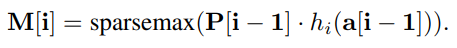

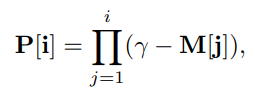

i번째 Mask는 M[i]는 Sparsemax라는 normalization을 수행합니다. 이는 각 decision step에서 가장 두드러진 Feature를 선택할 수 있는 기법입니다. P[i]는 (감마-이전 마스크)들의 곱으로 표현되고, 이는 이전 decision step로부터 처리된 Feature(a[i-1])과 Mask들의 영향을 고려하여 새로운 Mask를 만들겠다는 것입니다. 감마는 relaxation parameter로 감마가 1인 경우 Feature가 하나의 decision s
